In [1]:
import io
import pandas as pd
from datetime import datetime

In [2]:
df= pd.read_csv('Netflix.csv')

-Analisis Exploratorio

In [3]:
df.shape #Esto indica que el DataFrame tiene 2857 filas y 2 columnas.

(2857, 2)

In [4]:
df.info() #El método df.info() nos proporciona información resumida sobre el DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2857 entries, 0 to 2856
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   2857 non-null   object
 1   Date    2857 non-null   object
dtypes: object(2)
memory usage: 44.8+ KB


In [5]:
df.head(30)

,Title,Date
0,Human Playground: In Pursuit of Perfection,7/11/23
1,Human Playground: Rites of Passage,7/11/23
2,Doctor Cha: Episode 16,7/10/23
3,Doctor Cha: Episode 15,7/10/23
4,Human Playground: An Ancient Ritual,7/10/23
5,Doctor Cha: Episode 14,7/10/23
6,Doctor Cha: Episode 13,7/10/23
7,Doctor Cha: Episode 12,7/10/23
8,Doctor Cha: Episode 11,7/10/23
9,Self Made: Inspired by the Life of Madam C.J. ...,7/9/23


Verificar si hay valores nulos.



In [6]:
df.isnull()

,Title,Date
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
2852,False,False
2853,False,False
2854,False,False
2855,False,False


(NOTA: Estoy viendo que en el patron de mi DataFrame, hay diferentes partes que se separan mediante dos puntos. Lo que voy hacer es contar en cuantas partes se separan nuestro contenido.)

In [7]:
separar_lista= df.Title.str.split(pat=':', expand= False). to_frame()
separar_lista

,Title
0,"[Human Playground, In Pursuit of Perfection]"
1,"[Human Playground, Rites of Passage]"
2,"[Doctor Cha, Episode 16]"
3,"[Doctor Cha, Episode 15]"
4,"[Human Playground, An Ancient Ritual]"
...,...
2852,"[The Walking Dead, Season 7, The Well]"
2853,[Left Behind]
2854,[Hold the Dark]
2855,"[Hotel Transylvania 3, Summer Vacation]"


In [8]:
separar_lista['num_partes']= separar_lista.Title.apply(len)
separar_lista


,Title,num_partes
0,"[Human Playground, In Pursuit of Perfection]",2
1,"[Human Playground, Rites of Passage]",2
2,"[Doctor Cha, Episode 16]",2
3,"[Doctor Cha, Episode 15]",2
4,"[Human Playground, An Ancient Ritual]",2
...,...,...
2852,"[The Walking Dead, Season 7, The Well]",3
2853,[Left Behind],1
2854,[Hold the Dark],1
2855,"[Hotel Transylvania 3, Summer Vacation]",2


Utilizo el método value_counts() para contar el número de ocurrencias únicas de cada valor en una columna específica.
En mi caso queria contar el valor de 'num_partes'

In [9]:

separar_lista.num_partes.value_counts() 

num_partes
2    1240
1     751
3     730
4     135
5       1
Name: count, dtype: int64

(NOTA: Ahora lo que hare es analizar los Titulos por numero de partes para ver si existe un patrón.)

In [10]:
separar_lista.loc[separar_lista.num_partes==1]. head(10)

,Title,num_partes
19,[Annihilation],1
23,[Stepmom],1
25,[Heart Parade],1
27,[Inheritance],1
29,[28 Days],1
30,[True Spirit],1
34,[The Age of Adaline],1
38,[Airport '77],1
39,[King of Clones],1
42,[Where the Tracks End],1


In [11]:
separar_lista.loc[separar_lista.num_partes==2]. head(10)

,Title,num_partes
0,"[Human Playground, In Pursuit of Perfection]",2
1,"[Human Playground, Rites of Passage]",2
2,"[Doctor Cha, Episode 16]",2
3,"[Doctor Cha, Episode 15]",2
4,"[Human Playground, An Ancient Ritual]",2
5,"[Doctor Cha, Episode 14]",2
6,"[Doctor Cha, Episode 13]",2
7,"[Doctor Cha, Episode 12]",2
8,"[Doctor Cha, Episode 11]",2
10,"[Doctor Cha, Episode 10]",2


In [12]:
separar_lista.loc[separar_lista.num_partes==3]. head(10)

,Title,num_partes
28,"[Is It Cake?, Is It Cake, Too?, Everything I...",3
45,"[Lupin, Part 1, Chapter 1]",3
52,"[Flavorful Origins, Gansu Cuisine, Gua Gua]",3
53,"[Flavorful Origins, Gansu Cuisine, Flaxseed]",3
82,"[Manifest, Season 4, Final Boarding]",3
87,"[Manifest, Season 4, Formation]",3
88,"[Manifest, Season 4, Lift/Drag]",3
89,"[Manifest, Season 4, Threshold]",3
90,"[Manifest, Season 4, Furball]",3
91,"[Manifest, Season 4, Throttle]",3


In [13]:
separar_lista.loc[separar_lista.num_partes==4]. head(10)

,Title,num_partes
9,"[Self Made, Inspired by the Life of Madam C.J...",4
13,"[Self Made, Inspired by the Life of Madam C.J...",4
18,"[Self Made, Inspired by the Life of Madam C.J...",4
50,"[Our Planet, Our Planet II, Chapter 2, Foll...",4
51,"[Our Planet, Our Planet II, Chapter 1, Worl...",4
84,"[Arnold, Limited Series, Part 3, American]",4
96,"[Arnold, Limited Series, Part 2, Actor]",4
98,"[Arnold, Limited Series, Part 1, Athlete]",4
263,"[MH370, The Plane That Disappeared, Limited ...",4
264,"[MH370, The Plane That Disappeared, Limited ...",4


In [14]:
separar_lista.loc[separar_lista.num_partes==5]. head(10)

,Title,num_partes
43,"[Abstract, The Art of Design, Season 2, Ola...",5


Crear Variables.

(NOTA: Voy a trabajar un poco ya que mi DataFrame no tiene muchas variables. Asi es que voy a crear algunas...)

Variables del titulo.


In [15]:
import numpy as np
from datetime import datetime

In [16]:
separar_lista['Tipo']= np.where(separar_lista.num_partes <3, 'Pelicula', 'Serie')  
separar_lista

,Title,num_partes,Tipo
0,"[Human Playground, In Pursuit of Perfection]",2,Pelicula
1,"[Human Playground, Rites of Passage]",2,Pelicula
2,"[Doctor Cha, Episode 16]",2,Pelicula
3,"[Doctor Cha, Episode 15]",2,Pelicula
4,"[Human Playground, An Ancient Ritual]",2,Pelicula
...,...,...,...
2852,"[The Walking Dead, Season 7, The Well]",3,Serie
2853,[Left Behind],1,Pelicula
2854,[Hold the Dark],1,Pelicula
2855,"[Hotel Transylvania 3, Summer Vacation]",2,Pelicula


In [17]:
#este código está agregando una columna llamada 'Tipo' del DataFrame separar_lista al DataFrame 'df' utilizando la función pd.concat(). La concatenación se realiza a lo largo del eje horizontal, 
#lo que significa que las filas se alinearán correctamente según el índice de los DataFrames involucrados."""

df= pd.concat([df,separar_lista['Tipo']], axis=1) 
df

,Title,Date,Tipo
0,Human Playground: In Pursuit of Perfection,7/11/23,Pelicula
1,Human Playground: Rites of Passage,7/11/23,Pelicula
2,Doctor Cha: Episode 16,7/10/23,Pelicula
3,Doctor Cha: Episode 15,7/10/23,Pelicula
4,Human Playground: An Ancient Ritual,7/10/23,Pelicula
...,...,...,...
2852,The Walking Dead: Season 7: The Well,3/14/19,Serie
2853,Left Behind,3/12/19,Pelicula
2854,Hold the Dark,3/11/19,Pelicula
2855,Hotel Transylvania 3: Summer Vacation,3/10/19,Pelicula


(NOTA: Voy a dividir los Titulos en sus diferentes niveles y crear nuevas variables.)

In [18]:
separar_cols= df.Title.str.split(pat=':', expand=True)
separar_cols

,0,1,2,3,4
0,Human Playground,In Pursuit of Perfection,None,None,None
1,Human Playground,Rites of Passage,None,None,None
2,Doctor Cha,Episode 16,None,None,None
3,Doctor Cha,Episode 15,None,None,None
4,Human Playground,An Ancient Ritual,None,None,None
...,...,...,...,...,...
2852,The Walking Dead,Season 7,The Well,None,None
2853,Left Behind,None,None,None,None
2854,Hold the Dark,None,None,None,None
2855,Hotel Transylvania 3,Summer Vacation,None,None,None


In [19]:
separar_cols.columns= ['Nivel1', 'Nivel2', 'Nivel3', 'Nivel4', 'Nivel5']
separar_cols

,Nivel1,Nivel2,Nivel3,Nivel4,Nivel5
0,Human Playground,In Pursuit of Perfection,None,None,None
1,Human Playground,Rites of Passage,None,None,None
2,Doctor Cha,Episode 16,None,None,None
3,Doctor Cha,Episode 15,None,None,None
4,Human Playground,An Ancient Ritual,None,None,None
...,...,...,...,...,...
2852,The Walking Dead,Season 7,The Well,None,None
2853,Left Behind,None,None,None,None
2854,Hold the Dark,None,None,None,None
2855,Hotel Transylvania 3,Summer Vacation,None,None,None


In [20]:
df= pd.concat([df,separar_cols], axis=1)
df

,Title,Date,Tipo,Nivel1,Nivel2,Nivel3,Nivel4,Nivel5
0,Human Playground: In Pursuit of Perfection,7/11/23,Pelicula,Human Playground,In Pursuit of Perfection,None,None,None
1,Human Playground: Rites of Passage,7/11/23,Pelicula,Human Playground,Rites of Passage,None,None,None
2,Doctor Cha: Episode 16,7/10/23,Pelicula,Doctor Cha,Episode 16,None,None,None
3,Doctor Cha: Episode 15,7/10/23,Pelicula,Doctor Cha,Episode 15,None,None,None
4,Human Playground: An Ancient Ritual,7/10/23,Pelicula,Human Playground,An Ancient Ritual,None,None,None
...,...,...,...,...,...,...,...,...
2852,The Walking Dead: Season 7: The Well,3/14/19,Serie,The Walking Dead,Season 7,The Well,None,None
2853,Left Behind,3/12/19,Pelicula,Left Behind,None,None,None,None
2854,Hold the Dark,3/11/19,Pelicula,Hold the Dark,None,None,None,None
2855,Hotel Transylvania 3: Summer Vacation,3/10/19,Pelicula,Hotel Transylvania 3,Summer Vacation,None,None,None


-Variables derivadas de fechas.
(NOTA: Voy a extraer los diferentes componentes de una fecha para generar nuevas variables.)

In [21]:
df['Fecha'] = pd.to_datetime(df.Date)

df.drop(columns='Date',inplace=True)

df



/tmp/ipykernel_3010/1956895457.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Fecha'] = pd.to_datetime(df.Date)


,Title,Tipo,Nivel1,Nivel2,Nivel3,Nivel4,Nivel5,Fecha
0,Human Playground: In Pursuit of Perfection,Pelicula,Human Playground,In Pursuit of Perfection,None,None,None,2023-07-11
1,Human Playground: Rites of Passage,Pelicula,Human Playground,Rites of Passage,None,None,None,2023-07-11
2,Doctor Cha: Episode 16,Pelicula,Doctor Cha,Episode 16,None,None,None,2023-07-10
3,Doctor Cha: Episode 15,Pelicula,Doctor Cha,Episode 15,None,None,None,2023-07-10
4,Human Playground: An Ancient Ritual,Pelicula,Human Playground,An Ancient Ritual,None,None,None,2023-07-10
...,...,...,...,...,...,...,...,...
2852,The Walking Dead: Season 7: The Well,Serie,The Walking Dead,Season 7,The Well,None,None,2019-03-14
2853,Left Behind,Pelicula,Left Behind,None,None,None,None,2019-03-12
2854,Hold the Dark,Pelicula,Hold the Dark,None,None,None,None,2019-03-11
2855,Hotel Transylvania 3: Summer Vacation,Pelicula,Hotel Transylvania 3,Summer Vacation,None,None,None,2019-03-10


In [22]:
df.set_index('Fecha', inplace=True)
df

,Title,Tipo,Nivel1,Nivel2,Nivel3,Nivel4,Nivel5
Fecha,,,,,,,
2023-07-11,Human Playground: In Pursuit of Perfection,Pelicula,Human Playground,In Pursuit of Perfection,None,None,None
2023-07-11,Human Playground: Rites of Passage,Pelicula,Human Playground,Rites of Passage,None,None,None
2023-07-10,Doctor Cha: Episode 16,Pelicula,Doctor Cha,Episode 16,None,None,None
2023-07-10,Doctor Cha: Episode 15,Pelicula,Doctor Cha,Episode 15,None,None,None
2023-07-10,Human Playground: An Ancient Ritual,Pelicula,Human Playground,An Ancient Ritual,None,None,None
...,...,...,...,...,...,...,...
2019-03-14,The Walking Dead: Season 7: The Well,Serie,The Walking Dead,Season 7,The Well,None,None
2019-03-12,Left Behind,Pelicula,Left Behind,None,None,None,None
2019-03-11,Hold the Dark,Pelicula,Hold the Dark,None,None,None,None


(NOTA: Ahora creó una función para extaer los componentes.)

In [24]:
def atributos_fechas(data):
    data['Año']= data.index.year
    data['Mes']= data.index.month_name()
    data['Dia_Mes']= data.index.day
    data['Dia_Semana']= data.index.day_name()
    return(data)
atributos_fechas(df)

,Title,Tipo,Nivel1,Nivel2,Nivel3,Nivel4,Nivel5,Año,Mes,Dia_Mes,Dia_Semana
Fecha,,,,,,,,,,,
2023-07-11,Human Playground: In Pursuit of Perfection,Pelicula,Human Playground,In Pursuit of Perfection,None,None,None,2023,July,11,Tuesday
2023-07-11,Human Playground: Rites of Passage,Pelicula,Human Playground,Rites of Passage,None,None,None,2023,July,11,Tuesday
2023-07-10,Doctor Cha: Episode 16,Pelicula,Doctor Cha,Episode 16,None,None,None,2023,July,10,Monday
2023-07-10,Doctor Cha: Episode 15,Pelicula,Doctor Cha,Episode 15,None,None,None,2023,July,10,Monday
2023-07-10,Human Playground: An Ancient Ritual,Pelicula,Human Playground,An Ancient Ritual,None,None,None,2023,July,10,Monday
...,...,...,...,...,...,...,...,...,...,...,...
2019-03-14,The Walking Dead: Season 7: The Well,Serie,The Walking Dead,Season 7,The Well,None,None,2019,March,14,Thursday
2019-03-12,Left Behind,Pelicula,Left Behind,None,None,None,None,2019,March,12,Tuesday
2019-03-11,Hold the Dark,Pelicula,Hold the Dark,None,None,None,None,2019,March,11,Monday


-ANALISIS FINAL

¿Cuanto tiempo hace que tengo contratado Netflix?

In [25]:
from datetime import date

In [26]:
hoy= pd.Timestamp(date.today())
primer_dia= df.index.min()
tiempo= hoy-primer_dia

print(f'Memo llevas usando Netflix {tiempo.days}, dias')

Memo llevas usando Netflix 1642, dias


¿Cuanto tiempo me he gastado en Netflix hasta ahora?

In [27]:
coste_mensual= 12
gasto= tiempo.days /30* coste_mensual

print(f'Memo, hasta ahora te has gastado {gasto} dolares en Netflix')

Memo, hasta ahora te has gastado 656.8 dolares en Netflix


¿Cuanto tiempo de mi vida le dedico cada año a Netflix?

In [29]:


media_min_serie = 45
media_min_peliculas = 100

consumo = df.loc[df['Año'] < 2023].groupby('Tipo')['Title'].count()
minutos_peliculas_año = consumo['Pelicula'] * media_min_peliculas / 3
minutos_series_año = consumo['Serie'] * media_min_serie / 3

dias_peliculas_año = minutos_peliculas_año / 60 / 24
dias_series_año = minutos_series_año / 60 / 24

print(f"Memo, al año dedicas {round(dias_series_año)} días de tu vida a ver series y {round(dias_peliculas_año)} días de tu vida a ver películas")


Memo, al año dedicas 8 días de tu vida a ver series y 38 días de tu vida a ver películas


¿Cuales son las 10 Series de las que he visto mas capitulos?


<Axes: ylabel='Nivel1'>

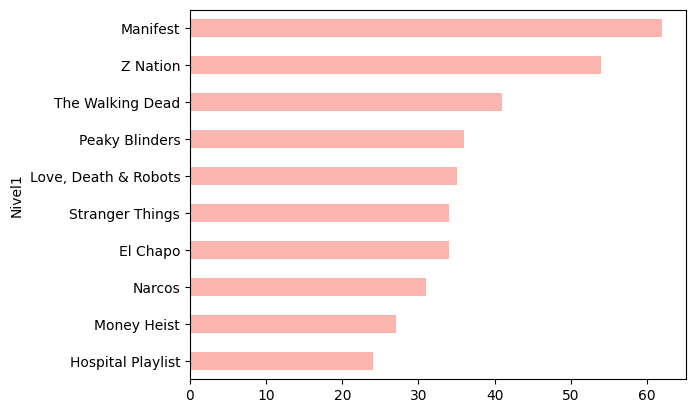

In [32]:
df.loc[df.Tipo=='Serie'].Nivel1.value_counts(ascending=True).tail(10).plot.barh(cmap='Pastel1')

¿Cuales son las 10 Peliculas que he visto?

<Axes: ylabel='Nivel1'>

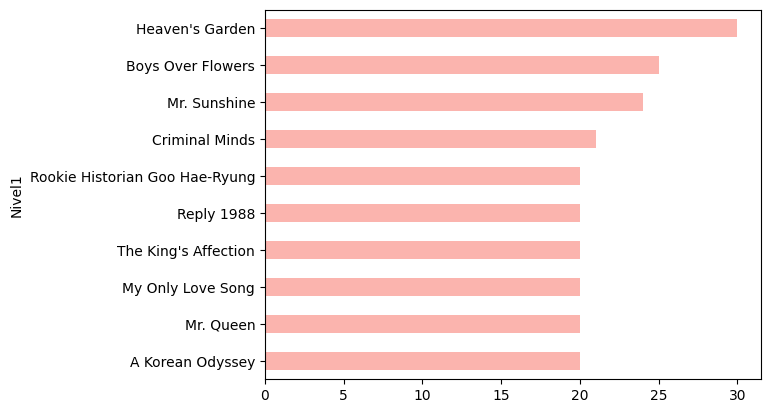

In [34]:
df.loc[df.Tipo=='Pelicula'].Nivel1.value_counts(ascending=True).tail(10).plot.barh(cmap='Pastel1')

¿Que dia de la semana suelo ver mas Series?

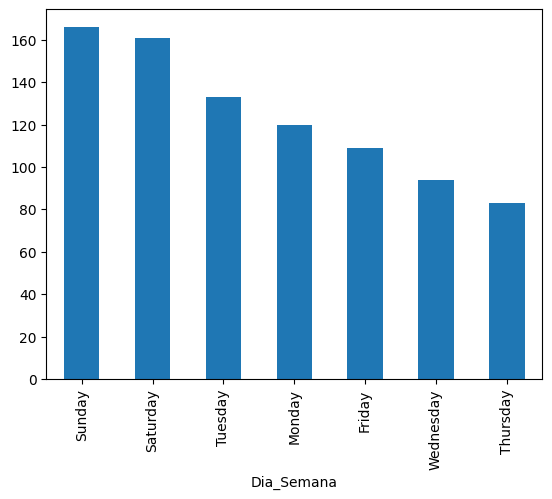

In [35]:
df.loc[df.Tipo=='Serie','Dia_Semana'].value_counts().plot(kind='bar');

¿Que dia de la semana suelo ver mas Peliculas?

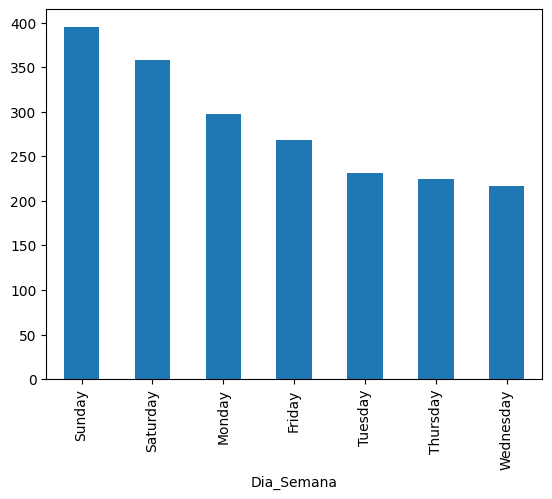

In [36]:
df.loc[df.Tipo=='Pelicula','Dia_Semana'].value_counts().plot(kind='bar');

¿Hay diferencias de ver Series y Peliculas en Netflix?

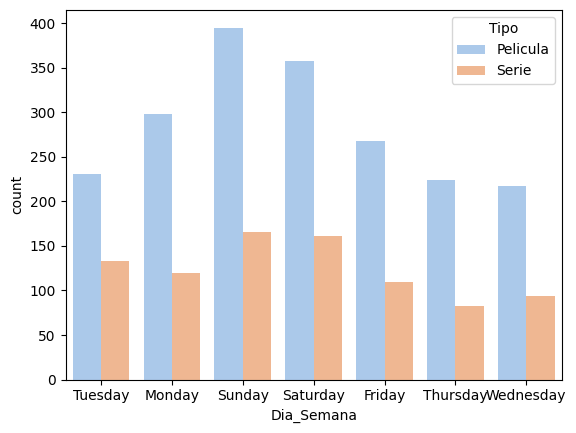

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df,x='Dia_Semana', hue='Tipo', palette='pastel');


¿El consumo es constante en el año? ó ¿Hay meses que consumo más?

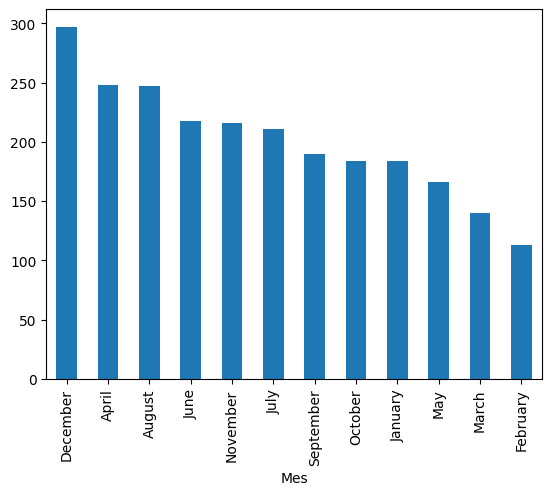

In [38]:
df.loc[df.Año <2023].Mes.value_counts().plot.bar();

¿En la pandemia, la cantidad de uso que hice de Netflix?

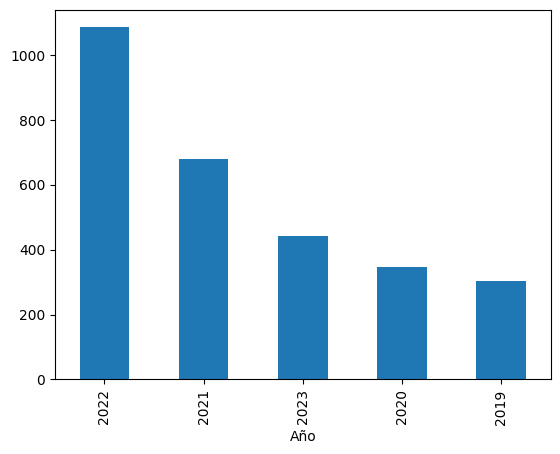

In [39]:
df.Año.value_counts().plot.bar();